<a href="https://colab.research.google.com/github/IBREEZZ/Code_Academy_Makeen2/blob/main/skewness%26kurtosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

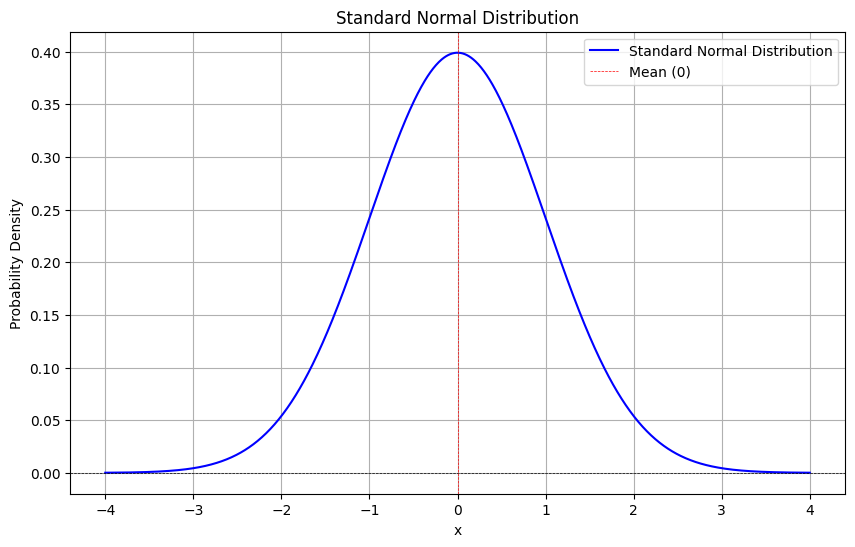

(np.float64(0.7895929600253445), np.float64(-0.926517221082158))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate data for the standard normal distribution
x = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x, 0, 1)  # mean = 0, std = 1

# Calculate skewness and kurtosis
skewness = stats.skew(pdf)
kurtosis = stats.kurtosis(pdf)

# Plotting the standard normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Standard Normal Distribution', color='blue')
plt.title('Standard Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='red', lw=0.5, ls='--', label='Mean (0)')
plt.legend()
plt.grid()
plt.show()

# Output skewness and kurtosis
skewness, kurtosis

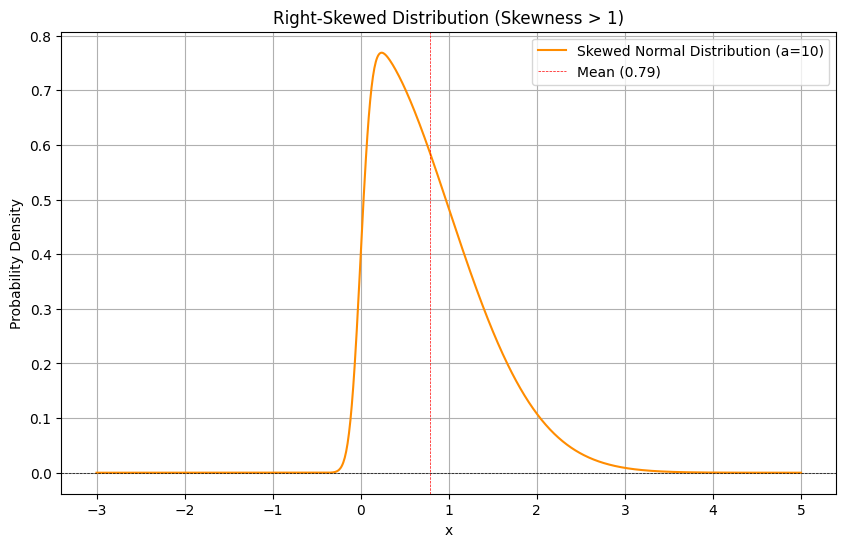

(np.float64(0.9462746626818942), np.float64(0.7753433107545642))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate skewed data (right-skewed)
a = 10
x = np.linspace(-3, 5, 1000)
pdf = stats.skewnorm.pdf(x, a, loc=0, scale=1)

# Calculate skewness and kurtosis from sampled data
data = stats.skewnorm.rvs(a, loc=0, scale=1, size=100000)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

# Plotting the skewed distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Skewed Normal Distribution (a=10)', color='darkorange')
plt.title('Right-Skewed Distribution (Skewness > 1)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(np.mean(data), color='red', lw=0.5, ls='--', label=f'Mean ({np.mean(data):.2f})')
plt.legend()
plt.grid()
plt.show()

# Output skewness and kurtosis
skewness, kurtosis


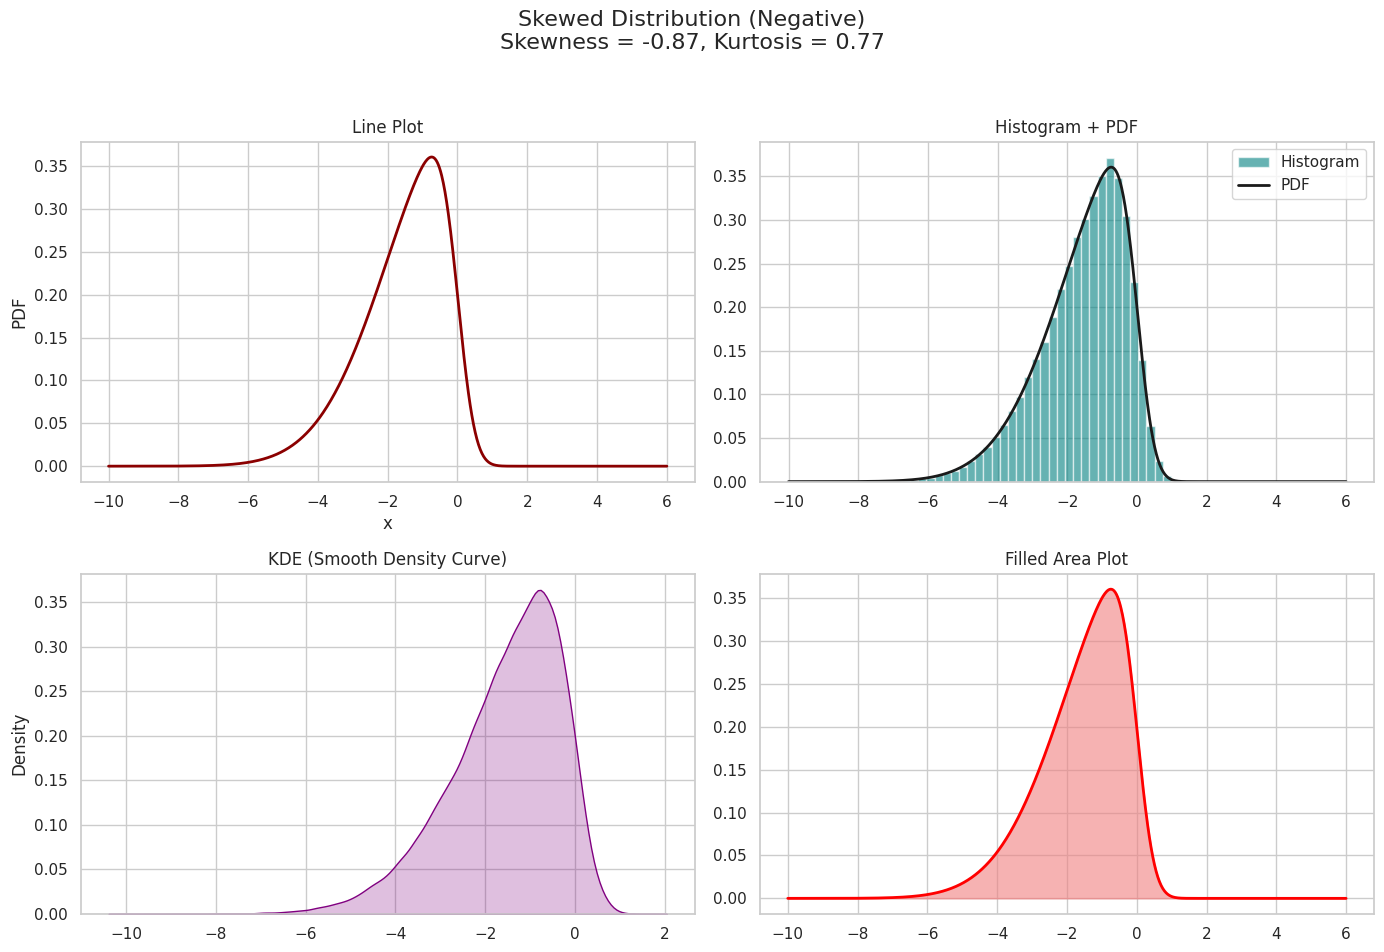

Skewness: -0.8660608963920637
Kurtosis: 0.7658749297023846


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# إعداد Seaborn
sns.set(style="whitegrid")

# توليد بيانات بتوزيع ملتوي سالب (negative skew)
a = -5  # معامل الالتواء: أقل من 0
scale = 2
data = stats.skewnorm.rvs(a, loc=0, scale=scale, size=100000)
x = np.linspace(-10, 6, 1000)
pdf = stats.skewnorm.pdf(x, a, loc=0, scale=scale)

# حساب الالتواء والتفرطح
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

# إنشاء الرسوم
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Skewed Distribution (Negative)\nSkewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}', fontsize=16)

# 1. Line Plot
axs[0, 0].plot(x, pdf, color='darkred', lw=2)
axs[0, 0].set_title("Line Plot")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("PDF")
axs[0, 0].grid(True)

# 2. Histogram + PDF
axs[0, 1].hist(data, bins=50, density=True, alpha=0.6, color='teal', label='Histogram')
axs[0, 1].plot(x, pdf, 'k', lw=2, label='PDF')
axs[0, 1].set_title("Histogram + PDF")
axs[0, 1].legend()

# 3. KDE using Seaborn
sns.kdeplot(data, fill=True, color='purple', ax=axs[1, 0])
axs[1, 0].set_title("KDE (Smooth Density Curve)")

# 4. Filled Area Plot
axs[1, 1].fill_between(x, pdf, color='lightcoral', alpha=0.6)
axs[1, 1].plot(x, pdf, color='red', lw=2)
axs[1, 1].set_title("Filled Area Plot")

# ضبط المسافات
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# طباعة القيم
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


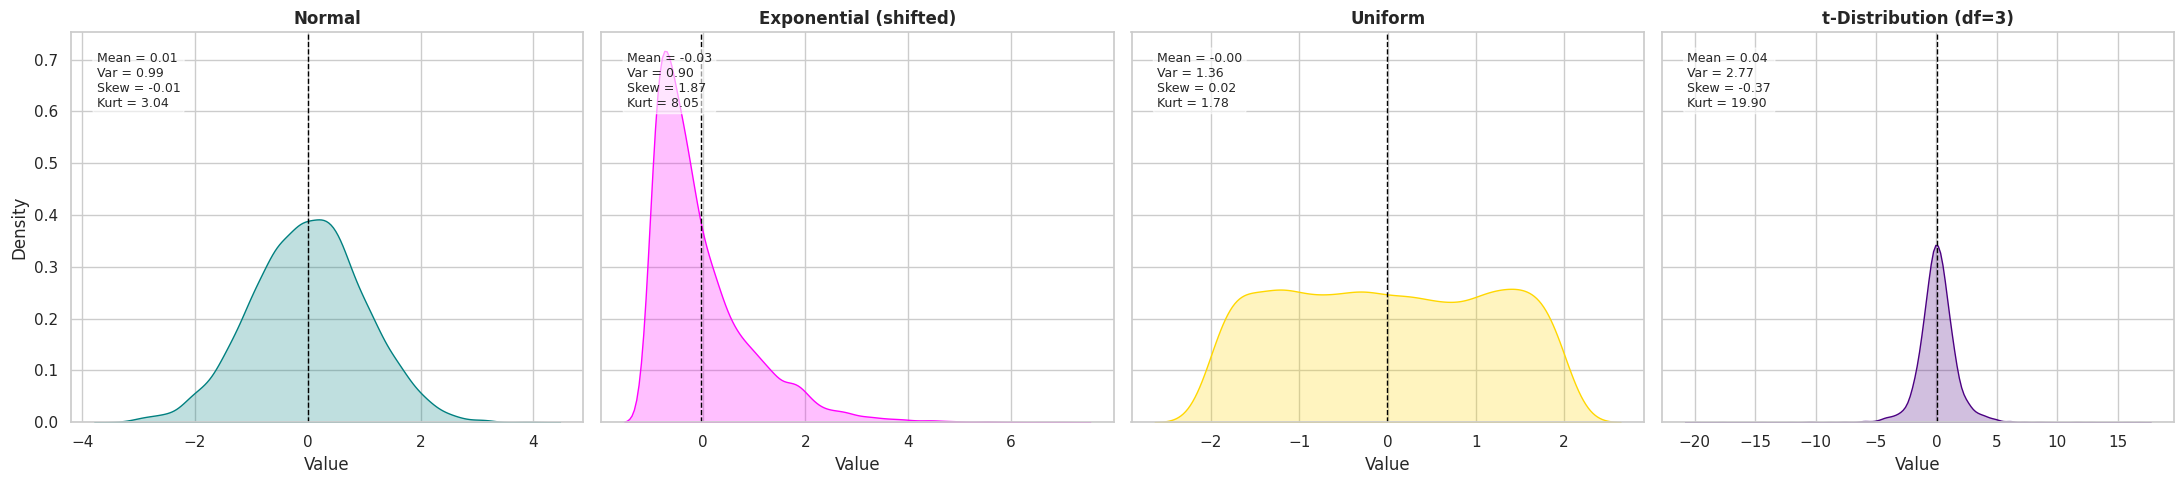

In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)

# Sample size
n = 5000

# Generate data
normal_data = np.random.normal(loc=0, scale=1, size=n)
expon_data = np.random.exponential(scale=1, size=n) - 1
uniform_data = np.random.uniform(low=-2, high=2, size=n)
t_data = np.random.standard_t(df=3, size=n)

# Function to compute moments and return annotation string
def get_moments(data):
    mean = np.mean(data)
    variance = np.var(data)
    skewness = stats.skew(data)
    kurt = stats.kurtosis(data, fisher=False)
    return f"Mean = {mean:.2f}\nVar = {variance:.2f}\nSkew = {skewness:.2f}\nKurt = {kurt:.2f}"

# Set seaborn style
sns.set(style="whitegrid")

# Create a horizontal row of subplots
fig, axs = plt.subplots(1, 4, figsize=(22, 5), sharey=True)

# Define datasets, titles, colors
datasets = [
    (normal_data, 'Normal', 'teal'),
    (expon_data, 'Exponential (shifted)', 'magenta'),
    (uniform_data, 'Uniform', 'gold'),
    (t_data, 't-Distribution (df=3)', 'indigo')
]

# Plot each distribution
for ax, (data, title, color) in zip(axs, datasets):
    sns.kdeplot(data, ax=ax, fill=True, color=color)
    mean = np.mean(data)
    ax.axvline(mean, color='black', linestyle='--', linewidth=1)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.text(0.05, 0.95, get_moments(data), transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
            fontsize=9)
    ax.set_xlabel("Value")
    ax.grid(True)

# Set common y-label
axs[0].set_ylabel("Density")

plt.tight_layout()
plt.show(

)
